<a href="https://colab.research.google.com/github/Nabizeus/Portfolio/blob/main/GettingStarted_ARIMA_RNN_Nabiz_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting started with TOAR-II data**[<img style="float: right;" src="2022-02-Logo-TOAR-DataBase.png" alt="" width="200"/>](2022-02-Logo-TOAR-DataBase.png)
(by Niklas Selke and Sabine Schröder)

___

**This Python notebook follows the examples from the [TOAR Quick Start Guide](https://toar-data.fz-juelich.de/sphinx/TOAR_UG_Vol02_Quick_Start/build/html/examples.html).**

## **Set up kernel (only needed the very first time)**
When you execute the notebook for the very first time please go to the next cell and press **y** to enable the cell.  
After that, press **Ctrl+Enter** to execute the cell (takes about a minute).  
Finally, after execution has finished, disable the cell again by pressing **r**. We do not need this cell again.

For all notebooks please choose the **TOARWorkshop** kernel in the top right corner which is now available.

## Import Python packages

In [1]:
from io import StringIO
import json
import pprint as pp

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import requests

**[StringIO](https://docs.python.org/3/library/io.html#io.StringIO)**: creates a file-like object from a simple string  
**[json](https://docs.python.org/3/library/json.html)**: module for processing JSON formatted files and strings  
**[pprint](https://docs.python.org/3/library/pprint.html)**: module for formatted print outputs (see also [pprint.ipynb](pprint.ipynb))  
**[matplotlib](https://matplotlib.org/)**: package for plotting  
**[pandas](https://pandas.pydata.org/)**: package for data analysis and manipulation  
**[requests](https://requests.readthedocs.io)**: package for sending HTTPS requests

### 1. Find stations by country

The TOAR-II database stores all countries in [ISO-3166 ALPHA-2 codes](https://en.wikipedia.org/wiki/ISO_3166-1#Current_codes).  
To search for all stations of a specific country, you use the argument _country_ and its ALPHA-2 code.

In [ ]:
# provides all stations from Andorra(AD) and Gibraltar(GI)
resp = requests.get("https://toar-data.fz-juelich.de/api/v2/stationmeta/?country=DE&limit=None", timeout=(3.05, 5))
stations = resp.json()

for ind in range(0,1):
    print(stations[ind]['id'])
    print(stations[ind]['codes'])
    print(stations[ind]['name'])
# Access nested variables
for item in data:
    name = item[1]
    #age = item["age"]
    #city = item["address"]["city"]
    #state = item["address"]["state"]
    #print(f"Name: {id}")
    #print(f"Name: {name}, Age: {age}, City: {city}, State: {state}")
print(stations)

ReadTimeout: HTTPSConnectionPool(host='toar-data.fz-juelich.de', port=443): Read timed out. (read timeout=5)

### 2. Find all time series of one station

From the last command, we found the station Escaldes-Engordany (Andorra). Its station code is AD0942A.  
Now we want to extract the metadata of all time series for this specific station that are stored in the TOAR database.

In [ ]:
resp = requests.get("https://toar-data.fz-juelich.de/api/v2/search/?codes=DEUB001&variable_id=21&limit=None", timeout=(3.05, 5))
metadata = resp.json()

In [ ]:
for i in range(0,2):
    print(metadata[i]['id'])

18400
94503


### 3. Download data of a specific time series

From the previous results, we choose the time series of ozone from the resource_provider (roles) European Environment Agency (EEA) with id 24896.  
We want to download all available data in csv format, which is possible by providing the argument _format=csv_.  
This means that data is no longer provided in JSON format (and we cannot use json() to access it).  
We want to read the data into a pandas DataFrame.  
(_Data from the TOAR-II database will always be delivered with its related metadata!_)

In [18]:

URL = "https://toar-data.fz-juelich.de/api/v2/data/timeseries/94503?format=csv&daterange=2010-01-01T00:00:00,2010-02-01T23:59:59"
#URL = "https://toar-data.fz-juelich.de/api/v2/search/?bounding_box=49,7,50,8&variable_id=21&limit=None"

resp = requests.get(URL)
pp.pprint(resp)
# save to file
with open("StationDEUB001_timeseries_id94503_JAN_2010_FEB_2010_air_temperature.csv", "w") as file:
    file.write(resp.text)


<Response [200]>


(For details on how we load the metadata here see [loading_metadata_from_data_download.ipynb](loading_metadata_from_data_download.ipynb))

In [ ]:
# read metadata from the top of the response
metadata = json.loads("\n".join([line[1:] for line in resp.text.split("\n") if line.startswith("#")]))
#("metadata:")
pp.pprint(metadata)



{'acknowledgement': None,
 'additional_metadata': {},
 'aggregation': 'none',
 'annotations': None,
 'changelog': [{'author_id': 1,
                'datetime': '2023-01-25T13:49:32.222208+00:00',
                'description': 'time series created',
                'new_value': '',
                'old_value': '',
                'period_end': None,
                'period_start': None,
                'timeseries_id': 94503,
                'type_of_change': 'created',
                'version': None}],
 'citation': 'European Centre for Medium-Range Weather Forecasts: time series '
             'of temp at Westerland, accessed from the TOAR database on '
             '2023-06-05 20:36:20.337576',
 'data_end_date': '1900-01-01T00:00:00+00:00',
 'data_license_accepted': None,
 'data_origin': 'ERA5',
 'data_origin_type': 'model',
 'data_start_date': '2050-01-01T00:00:00+00:00',
 'dataset_approved_by_provider': None,
 'id': 94503,
 'label': '',
 'order': 3,
 'programme': {'description': '

In [19]:
# read the actual data
#csv_file = "StationDEUB001_timeseries_id94503_JAN_2010_FEB_2010_air_temperature.csv"
data = pd.read_csv(StringIO(resp.text), comment="#", index_col="datetime", parse_dates=True, infer_datetime_format=True)
print(f"data:\n{data}")

data:
                              value  flags                       version  \
datetime                                                                   
2010-01-01 00:00:00+00:00 -1.501678      1  000001.000000.00000000000000   
2010-01-01 01:00:00+00:00 -1.473236      1  000001.000000.00000000000000   
2010-01-01 02:00:00+00:00 -1.453033      1  000001.000000.00000000000000   
2010-01-01 03:00:00+00:00 -1.469177      1  000001.000000.00000000000000   
2010-01-01 04:00:00+00:00 -1.509705      1  000001.000000.00000000000000   
...                             ...    ...                           ...   
2010-02-01 19:00:00+00:00 -1.659912      1  000001.000000.00000000000000   
2010-02-01 20:00:00+00:00 -0.974060      1  000001.000000.00000000000000   
2010-02-01 21:00:00+00:00 -0.098663      1  000001.000000.00000000000000   
2010-02-01 22:00:00+00:00  1.426788      1  000001.000000.00000000000000   
2010-02-01 23:00:00+00:00  1.769165      1  000001.000000.00000000000000   

     

### 4. Plot the time series

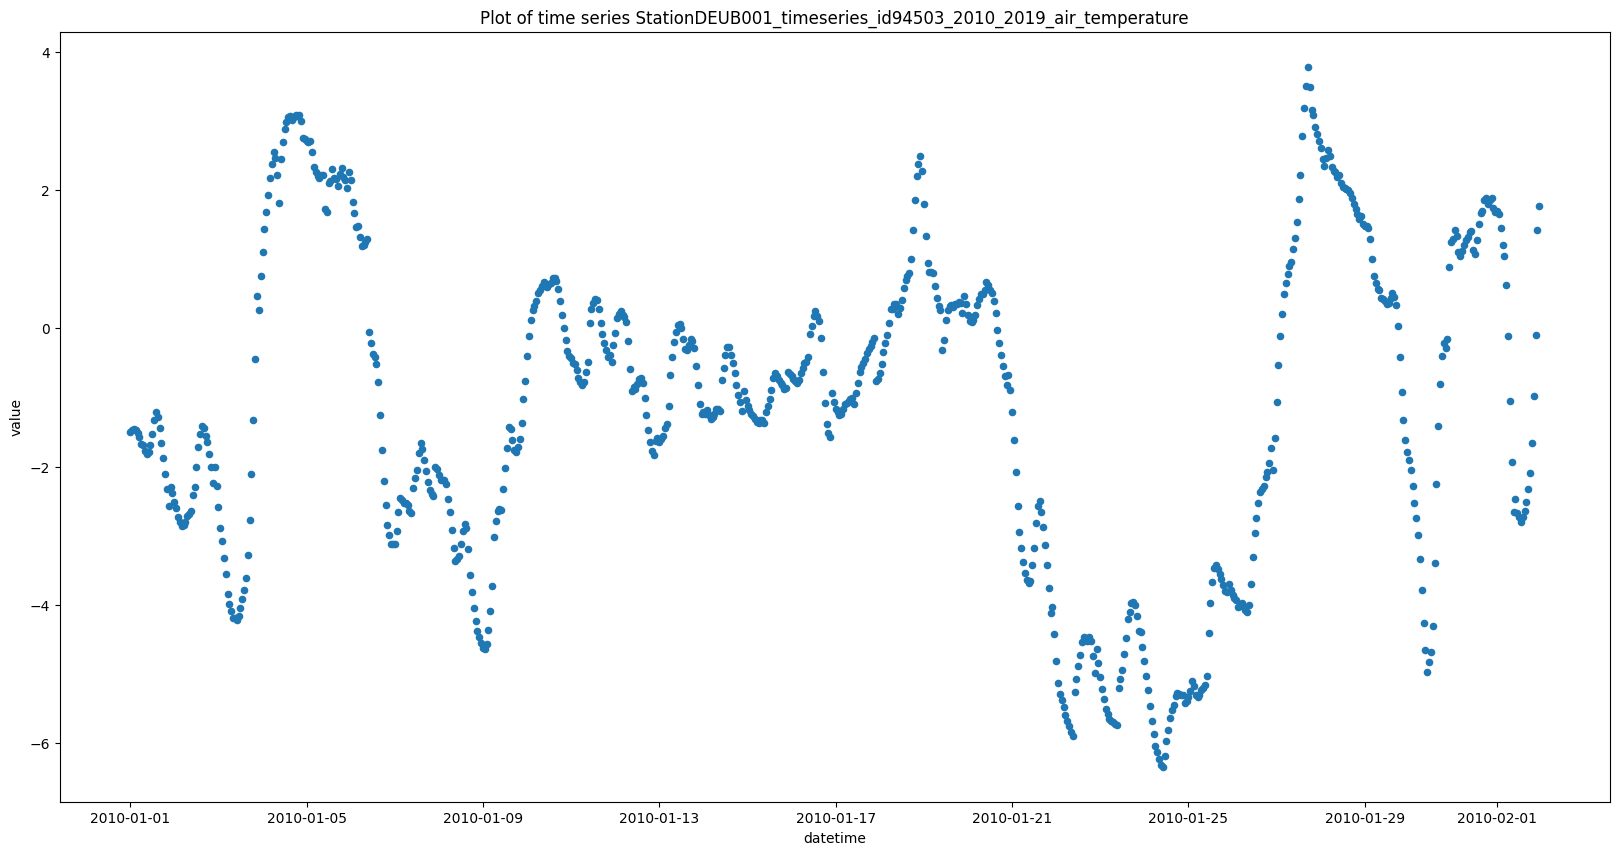

In [20]:
data.reset_index().plot(x="datetime", y="value", kind="scatter", title="Plot of time series StationDEUB001_timeseries_id94503_2010_2019_air_temperature", figsize=(20, 10));

In [6]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [7]:
data.head()

,value,flags,version,timeseries_id
datetime,,,,
2010-01-01 00:00:00+00:00,-1.501678,1,000001.000000.00000000000000,94503
2010-01-01 01:00:00+00:00,-1.473236,1,000001.000000.00000000000000,94503
2010-01-01 02:00:00+00:00,-1.453033,1,000001.000000.00000000000000,94503
2010-01-01 03:00:00+00:00,-1.469177,1,000001.000000.00000000000000,94503
2010-01-01 04:00:00+00:00,-1.509705,1,000001.000000.00000000000000,94503


In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [77]:
data.reset_index(inplace=True)

In [78]:
data.head()

,datetime,value,flags,version,timeseries_id
0,2010-01-01 00:00:00+00:00,-1.501678,1,000001.000000.00000000000000,94503
1,2010-01-01 01:00:00+00:00,-1.473236,1,000001.000000.00000000000000,94503
2,2010-01-01 02:00:00+00:00,-1.453033,1,000001.000000.00000000000000,94503
3,2010-01-01 03:00:00+00:00,-1.469177,1,000001.000000.00000000000000,94503
4,2010-01-01 04:00:00+00:00,-1.509705,1,000001.000000.00000000000000,94503


In [79]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values('datetime')
data = data[['datetime', 'value']]

In [ ]:
data.head()

,datetime,value
0,2010-01-01 00:00:00+00:00,-1.501678
1,2010-01-01 01:00:00+00:00,-1.473236
2,2010-01-01 02:00:00+00:00,-1.453033
3,2010-01-01 03:00:00+00:00,-1.469177
4,2010-01-01 04:00:00+00:00,-1.509705


In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


In [ ]:
X_train = train_data['datetime'].astype(np.int64) // 10**9  # Convert datetime to epoch timestamp
y_train = train_data['value']
X_test = test_data['datetime'].astype(np.int64) // 10**9
y_test = test_data['value']


# Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression()

In [ ]:
print(model.fit)

<bound method LinearRegression.fit of LinearRegression()>


In [ ]:
#next_timestamps = X_test[-1:].values.reshape(-1, 1) + np.array([3600, 7200, 10800])  # Add 1, 2, 3 hours to the last timestamp in the test set

predicted_values = model.predict(X_test.values.reshape(-1,1))


In [ ]:
print(predicted_values)

[-0.72602068 -0.72519179 -0.72436291 -0.72353403 -0.72270515 -0.72187626
 -0.72104738 -0.7202185  -0.71938962 -0.71856073 -0.71773185 -0.71690297
 -0.71607409 -0.7152452  -0.71441632 -0.71358744 -0.71275856 -0.71192968
 -0.71110079 -0.71027191 -0.70944303 -0.70861415 -0.70778526 -0.70695638
 -0.7061275  -0.70529862 -0.70446973 -0.70364085 -0.70281197 -0.70198309
 -0.7011542  -0.70032532 -0.69949644 -0.69866756 -0.69783867 -0.69700979
 -0.69618091 -0.69535203 -0.69452314 -0.69369426 -0.69286538 -0.6920365
 -0.69120761 -0.69037873 -0.68954985 -0.68872097 -0.68789209 -0.6870632
 -0.68623432 -0.68540544 -0.68457656 -0.68374767 -0.68291879 -0.68208991
 -0.68126103 -0.68043214 -0.67960326 -0.67877438 -0.6779455  -0.67711661
 -0.67628773 -0.67545885 -0.67462997 -0.67380108 -0.6729722  -0.67214332
 -0.67131444 -0.67048555 -0.66965667 -0.66882779 -0.66799891 -0.66717002
 -0.66634114 -0.66551226 -0.66468338 -0.66385449 -0.66302561 -0.66219673
 -0.66136785 -0.66053897 -0.65971008 -0.6588812  -0.6

In [ ]:
from sklearn.metrics import mean_absolute_error
y_test = test_data['value']
actual_values = y_test.values.reshape(-1,1)
# Assuming you have the actual values in a variable named 'actual_values'
mae = mean_absolute_error(actual_values, predicted_values)
print("MAE:", mae)


MAE: 0.9134139246956737


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual_values, predicted_values)
print("MSE:", mse)


MSE: 1.3046728464823045


In [ ]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 1.1422227656995392


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(actual_values, predicted_values)
print("R2 Score:", r2)


R2 Score: -0.9421162837030974


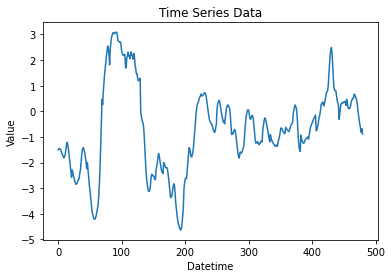

In [ ]:
data['value'].plot()
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


# ARIMA

In [40]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['value'], order=(1, 2, 1))  # Replace p, d, q with appropriate values
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [41]:
forecast = model_fit.forecast(steps=3)  # Replace 3 with the number of steps you want to forecast


In [42]:
print('y_test series:', y_test)
print('forecast series:', forecast)
# Concatenate the forecasted values DataFrame with the test series DataFrame
combined_data = pd.concat([y_test, forecast])

y_test series: [[-2.2760925 ]
 [-2.1469421 ]
 [-2.0800476 ]
 [-1.9527588 ]
 [-1.7273254 ]
 [-2.0542908 ]
 [-1.5854187 ]
 [-1.0719604 ]
 [-0.5316162 ]
 [-0.11343384]
 [ 0.21008301]
 [ 0.49505615]
 [ 0.66226196]
 [ 0.7862854 ]
 [ 0.90335083]
 [ 0.960968  ]
 [ 1.1546631 ]
 [ 1.3008423 ]
 [ 1.5429382 ]
 [ 1.8664856 ]
 [ 2.2201233 ]
 [ 2.7747498 ]
 [ 3.1882935 ]
 [ 3.502777  ]
 [ 3.7835388 ]
 [ 3.4943542 ]
 [ 3.1595764 ]
 [ 3.0827332 ]
 [ 2.9131165 ]
 [ 2.816986  ]
 [ 2.7026672 ]
 [ 2.6054688 ]
 [ 2.450653  ]
 [ 2.3433228 ]
 [ 2.457489  ]
 [ 2.5856628 ]
 [ 2.488037  ]
 [ 2.3334656 ]
 [ 2.2792053 ]
 [ 2.2604065 ]
 [ 2.1958923 ]
 [ 2.221466  ]
 [ 2.0959167 ]
 [ 2.0438232 ]
 [ 2.0263367 ]
 [ 2.0187073 ]
 [ 2.0035095 ]
 [ 1.9605713 ]
 [ 1.8796997 ]
 [ 1.8042908 ]
 [ 1.7257385 ]
 [ 1.657135  ]
 [ 1.5844727 ]
 [ 1.6204834 ]
 [ 1.513977  ]
 [ 1.4831238 ]
 [ 1.4833069 ]
 [ 1.45047   ]
 [ 1.2922668 ]
 [ 1.0099792 ]
 [ 0.757782  ]
 [ 0.6587219 ]
 [ 0.5726013 ]
 [ 0.5532837 ]
 [ 0.43515015]
 [ 0.41903

TypeError: ignored

In [ ]:
print('combined_data',combined_data)

combined_data 384   -1.161804
385   -1.214661
386   -1.250275
387   -1.233429
388   -1.165619
         ...   
505   -1.194456
506   -1.194465
507   -1.194472
508   -1.194476
509   -1.194479
Length: 126, dtype: float64


In [ ]:
print(y_train)

0     -1.501678
1     -1.473236
2     -1.453033
3     -1.469177
4     -1.509705
         ...   
379   -1.387909
380   -1.506378
381   -1.565735
382   -0.929413
383   -1.065765
Name: value, Length: 384, dtype: float64


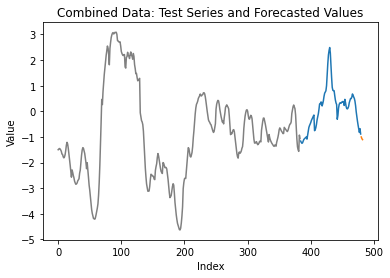

In [ ]:
# Plot the combined_data
plt.plot(y_train.index, y_train,color='gray')
plt.plot(y_test.index, y_test)
plt.plot(forecast.index, forecast)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Combined Data: Test Series and Forecasted Values')
plt.show()

# RNN method

In [44]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [67]:
data.head()

,value,flags,version,timeseries_id
datetime,,,,
2010-01-01 00:00:00+00:00,-1.501678,1,000001.000000.00000000000000,94503
2010-01-01 01:00:00+00:00,-1.473236,1,000001.000000.00000000000000,94503
2010-01-01 02:00:00+00:00,-1.453033,1,000001.000000.00000000000000,94503
2010-01-01 03:00:00+00:00,-1.469177,1,000001.000000.00000000000000,94503
2010-01-01 04:00:00+00:00,-1.509705,1,000001.000000.00000000000000,94503


In [21]:
# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))


In [22]:
# Define the size of the training set
train_size = int(len(normalized_values) * 0.8)  # 80% for training

# Split the data into training and testing sets
train_data = normalized_values[:train_size]
test_data = normalized_values[train_size:]


In [58]:
# Define the number of previous time steps to consider for each prediction
time_steps = 14

# Create input and output sequences for training and testing
def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)


In [59]:
# Define the RNN model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))  # Add dropout layer with a dropout rate of 0.2
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(X_train, y_train, epochs=50, batch_size=16)


Epoch 1/20
38/38 [==============================] - 4s 10ms/step - loss: 0.0484
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 3/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 4/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0073
Epoch 5/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 6/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0058
Epoch 7/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0056
Epoch 8/20
38/38 [==============================] - 0s 9ms/step - loss: 0.0045
Epoch 9/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0046
Epoch 10/20
38/38 [==============================] - 1s 14ms/step - loss: 0.0040
Epoch 11/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 12/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0039
Epoch 13/20
38/38 [=======================

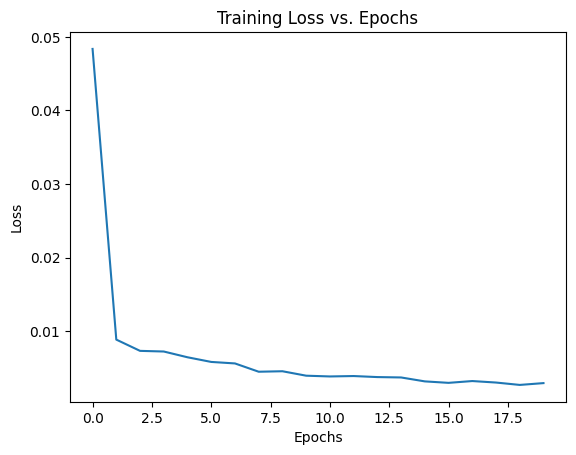

In [60]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

# Access the loss values from the history object
loss = history.history['loss']

# Plot the loss curve
plt.plot(range(len(loss)), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs. Epochs')
plt.show()


In [61]:
# Generate predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the normalized predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)

# Inverse transform the normalized test data to the original scale
y_test = scaler.inverse_transform(y_test)


5/5 [==============================] - 1s 5ms/step


In [62]:
# Calculate evaluation metrics such as RMSE or MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 0.6787389608756403
MAE: 0.45822816173937186


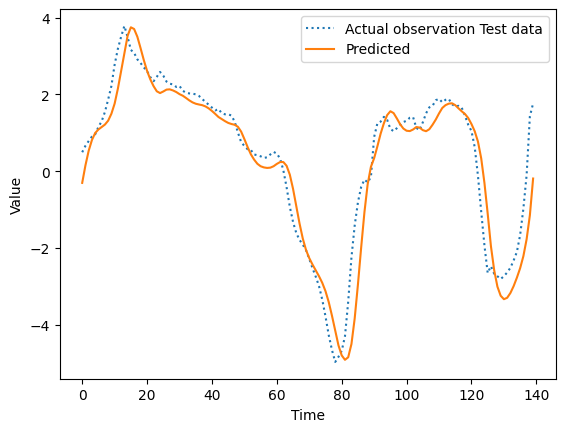

In [63]:
# Plot the actual values and the predictions
plt.plot(y_test, label='Actual observation Test data',linestyle='dotted')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [64]:
# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)


In [65]:
# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)


1/1 [==============================] - 0s 44ms/step


In [69]:
data.values.reshape(-1,1)
data.head()

,value,flags,version,timeseries_id
datetime,,,,
2010-01-01 00:00:00+00:00,-1.501678,1,000001.000000.00000000000000,94503
2010-01-01 01:00:00+00:00,-1.473236,1,000001.000000.00000000000000,94503
2010-01-01 02:00:00+00:00,-1.453033,1,000001.000000.00000000000000,94503
2010-01-01 03:00:00+00:00,-1.469177,1,000001.000000.00000000000000,94503
2010-01-01 04:00:00+00:00,-1.509705,1,000001.000000.00000000000000,94503


NameError: ignored

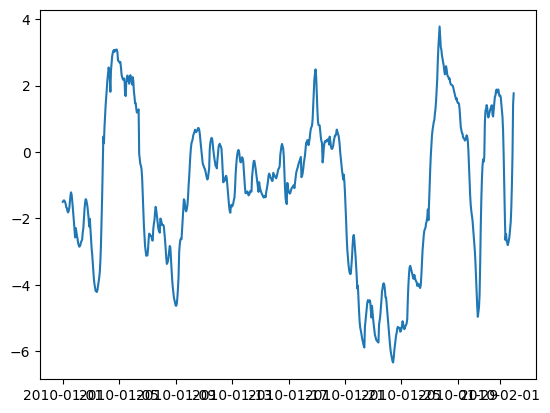

In [72]:
# Plot the actual values and the forecasted values
plt.plot(data.index, values, label='Actual')
plt.plot(future_dates, forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [75]:
data.head()

,value,flags,version,timeseries_id
datetime,,,,
2010-01-01 00:00:00+00:00,-1.501678,1,000001.000000.00000000000000,94503
2010-01-01 01:00:00+00:00,-1.473236,1,000001.000000.00000000000000,94503
2010-01-01 02:00:00+00:00,-1.453033,1,000001.000000.00000000000000,94503
2010-01-01 03:00:00+00:00,-1.469177,1,000001.000000.00000000000000,94503
2010-01-01 04:00:00+00:00,-1.509705,1,000001.000000.00000000000000,94503


1/1 [==============================] - 0s 25ms/step


<ipython-input-82-bcf85a75072f>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right'


AttributeError: ignored

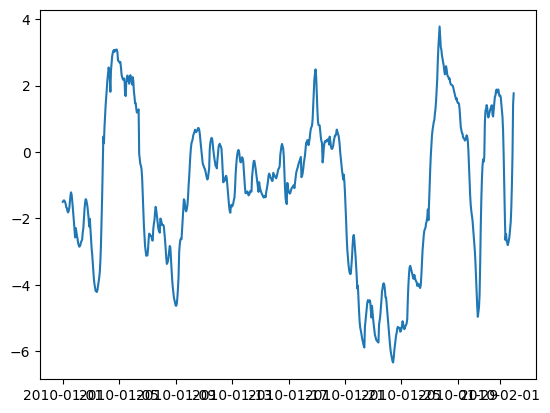

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right'
)[1:]

# Extend the forecast array to match the length of future_dates
forecast_extended = np.concatenate([forecast.flatten(), np.zeros(future_steps)])


# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual')
plt.plot(future_dates, forecast.extended, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


<ipython-input-83-9e00ed5ab861>:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

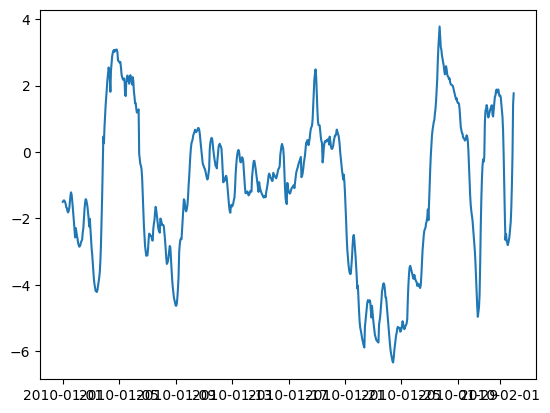

In [83]:
# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Extend the forecast array to match the length of future_dates
forecast_extended = np.concatenate([forecast.flatten(), np.zeros(future_steps)])

# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual')
plt.plot(future_dates, forecast_extended, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 36ms/step


ValueError: ignored

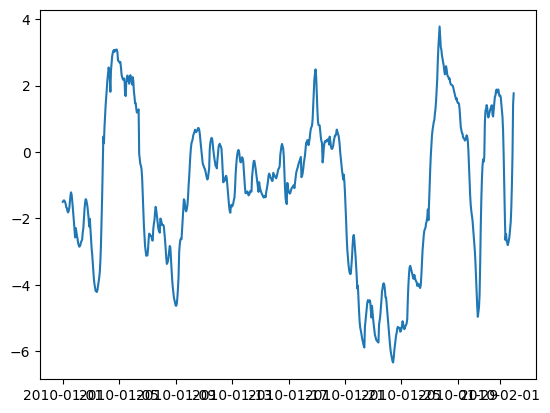

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps, freq='H')

# Extend the forecast array to match the length of future_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual')
plt.plot(future_dates, forecast_extended, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Extend the forecast array to match the length of future_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
all_dates = pd.concat([data['datetime'], future_dates])
all_values = np.concatenate([values, forecast_extended])

plt.plot(all_dates, all_values, label='Actual and Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 101ms/step


<ipython-input-85-6c1f23635500>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


TypeError: ignored

1/1 [==============================] - 0s 23ms/step


<ipython-input-89-9470ed10dbdb>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


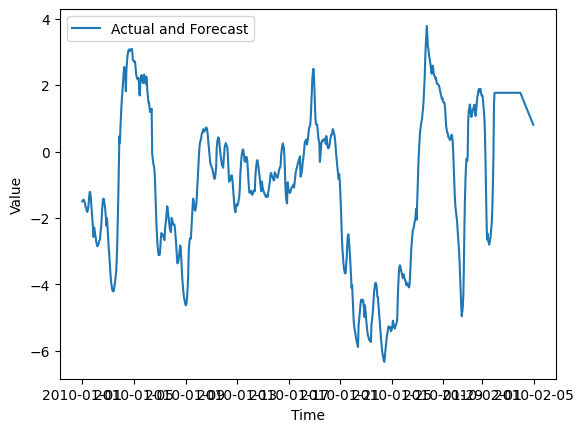

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Convert future_dates to a Pandas Series
future_dates = pd.Series(future_dates)

# Extend the forecast array to match the length of future_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
all_dates = pd.concat([data['datetime'], future_dates])
all_values = np.concatenate([values, forecast_extended])

plt.plot(all_dates, all_values, label='Actual and Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



1/1 [==============================] - 0s 24ms/step


<ipython-input-92-427e810b14fb>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

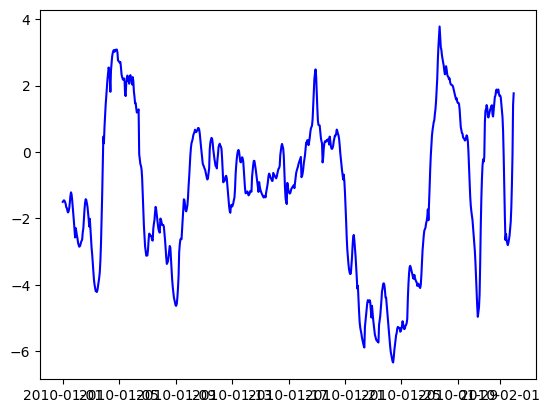

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Convert future_dates to a Pandas Series
future_dates = pd.Series(future_dates)

# Extend the forecast array to match the length of future_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values in blue
plt.plot(data['datetime'], values, label='Actual', color='blue')

# Plot the forecasted values in green
plt.plot(future_dates, forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], future_dates])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(all_dates, values, label='Actual', color='blue')
plt.plot(all_dates[-future_steps-1:], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 69ms/step


<ipython-input-93-52d14728a401>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


TypeError: ignored

1/1 [==============================] - 0s 44ms/step


<ipython-input-94-7091767dbb3e>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

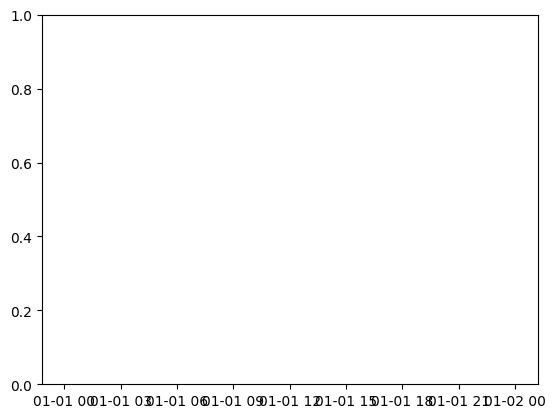

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(all_dates, values, label='Actual', color='blue')
plt.plot(all_dates[-future_steps:], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 206ms/step


<ipython-input-95-a07e530c0b18>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps, closed='right')


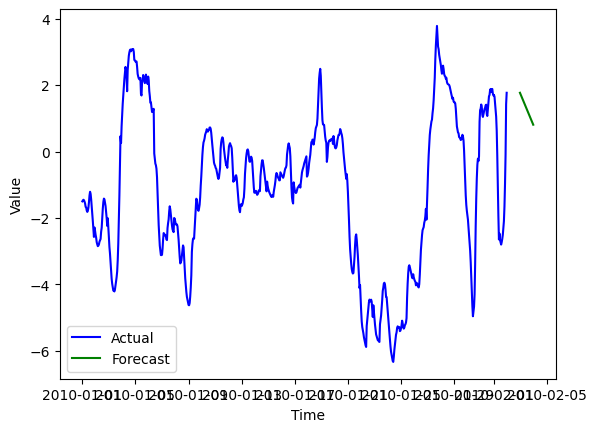

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps, closed='right')

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(all_dates[:len(values)], values, label='Actual', color='blue')
plt.plot(all_dates[len(values):], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 39ms/step


<ipython-input-96-854f32b00fba>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps, closed='right')


ValueError: ignored

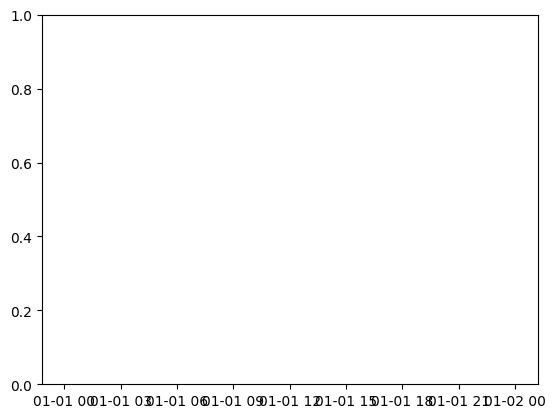

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps, closed='right')

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Reset the index of the values series
values_series = pd.Series(values).reset_index(drop=True)

# Plot the actual values and the forecasted values
plt.plot(all_dates, values_series, label='Actual', color='blue')
plt.plot(all_dates[-future_steps:], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 64ms/step


<ipython-input-97-5643c2b2a05c>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

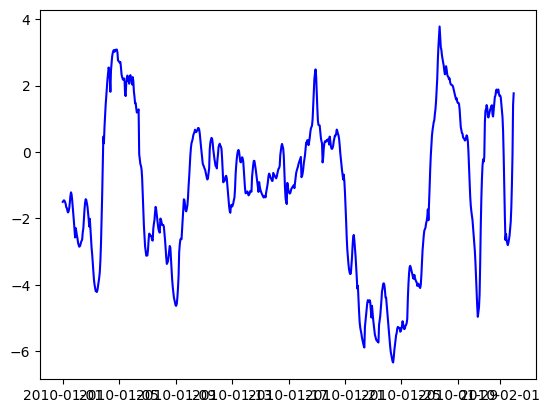

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(all_dates[:len(values)], values, label='Actual', color='blue')
plt.plot(all_dates[len(values)-1:], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 61ms/step


<ipython-input-98-7ff7dcc4fdf4>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

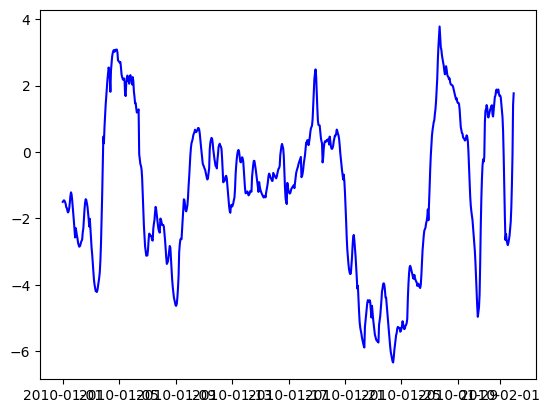

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(all_dates[:len(values)], values, label='Actual', color='blue')
plt.plot(all_dates[-future_steps:], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 42ms/step


<ipython-input-99-1ece4516fb0a>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

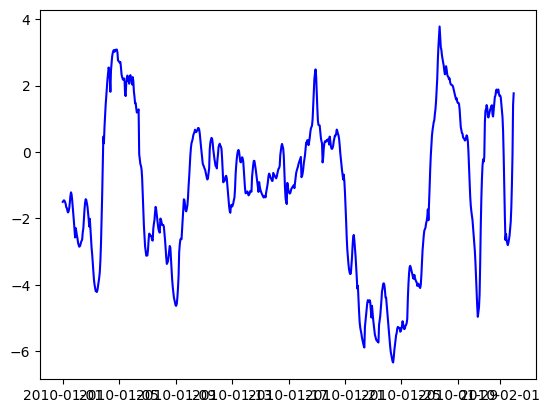

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual', color='blue')
plt.plot(all_dates[-future_steps:], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 120ms/step


<ipython-input-100-1ece4516fb0a>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

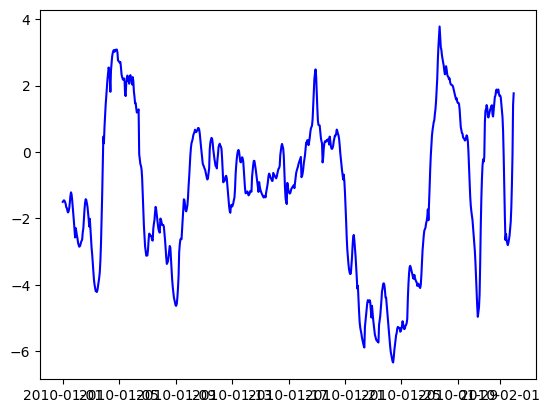

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual', color='blue')
plt.plot(all_dates[-future_steps:], forecast_extended, label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 144ms/step


<ipython-input-101-dc0f6fae2a1e>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

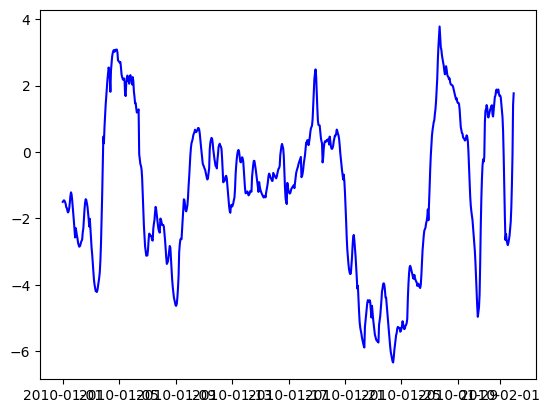

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Extend the forecast array to match the length of all_dates
forecast_extended = np.concatenate([values[-1:], forecast.flatten()])

# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual', color='blue')
plt.plot(all_dates[-future_steps:], forecast_extended[-future_steps:], label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 82ms/step


<ipython-input-102-ec7825f1ac33>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]


ValueError: ignored

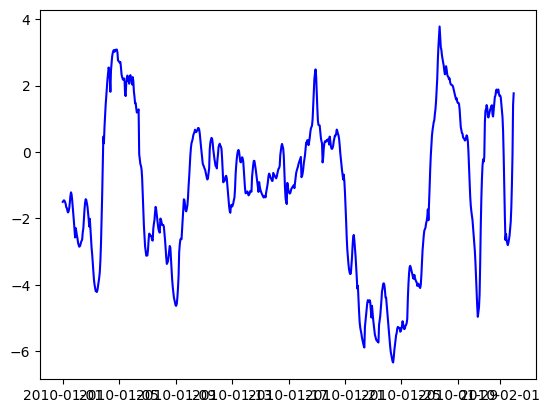

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps+1, closed='right')[1:]

# Concatenate the original dates and the future dates
all_dates = pd.concat([data['datetime'], pd.Series(future_dates)])

# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual', color='blue')
plt.plot(all_dates[-future_steps:], forecast.flatten(), label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


1/1 [==============================] - 0s 34ms/step


<ipython-input-103-de14a25d3c28>:34: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(last_date, periods=future_steps, closed='right')


ValueError: ignored

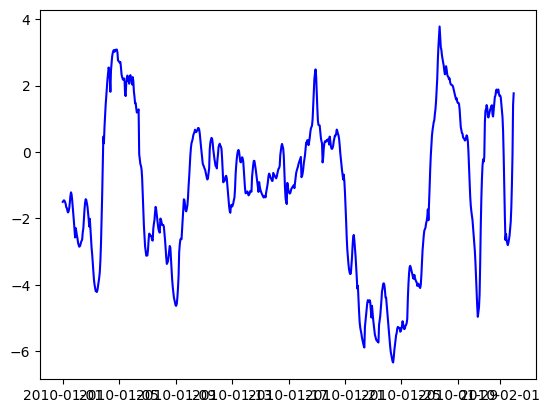

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming you have the time series data stored in a DataFrame called 'data'

# Extract the values from the 'value' column as a NumPy array
values = data['value'].values

# Normalize the values to a range between 0 and 1
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(values.reshape(-1, 1))

# Create input sequence for prediction
def create_input_sequence(data, time_steps):
    sequence = data[-time_steps:]  # Take the last 'time_steps' values as input
    return np.array(sequence).reshape(1, -1, 1)

# Define the number of future points to forecast
future_steps = 3

# Create input sequence for prediction using the last 'time_steps' values
input_sequence = create_input_sequence(normalized_values, time_steps)

# Generate the forecast for future points
forecast = model.predict(input_sequence)

# Inverse transform the normalized forecast to the original scale
forecast = scaler.inverse_transform(forecast)

# Generate future dates for the forecasted points
last_date = data['datetime'].iloc[-1]
future_dates = pd.date_range(last_date, periods=future_steps, closed='right')

# Plot the actual values and the forecasted values
plt.plot(data['datetime'], values, label='Actual', color='blue')
plt.plot(future_dates, forecast.flatten(), label='Forecast', color='green')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
